### Data Visualization Notebook

**Objectives**
- Answer bussiness requirements 1:
    + The client is interested in conducting a study to visually differentiate a healthy cherry leaf from one with powdery mildew.

**Inputs**
- inputs/cherry_leaves_dataset/cherry-leaves/train/
- inputs/cherry_leaves_dataset/cherry-leaves/test/
- inputs/cherry_leaves_dataset/cherry-leaves/validation/

**Outputs**
1. Distribution of Image File Sizes Visualization:
- A histogram plot showing the distribution of file sizes for the images in the dataset.
- This plot helps to understand the variation in image file sizes across the dataset, displayed in bytes, and the number of images corresponding to various size ranges.

2. Image Feature Embeddings File (image_embeddings.joblib):
- Contains the feature embeddings for each image, extracted using the deep learning model `ResNet50`.
- These embeddings are high-dimensional numerical representations of the image content, capturing essential visual features like textures, shapes, and colors learned through the model's training on ImageNet.
- The embeddings are stored in a dictionary where each key is the image path, and the value is the corresponding flattened feature vector.
- The file is saved in a compressed .joblib format, which is efficient for storing large numpy arrays and makes loading the data faster and easier in future processing.

3. Mean and Variability of Images per Label Plot:
- Image Processing: Images are loaded, resized to a uniform size, and normalized to ensure consistency across the dataset.
- Feature Analysis: For each label, the average and standard deviation of the image set are computed, revealing the common features and variability within each category.
- Visualization: Plots of the average and variability for each label are created, providing insights into the dataset’s characteristics.
- Saving Results: Optionally, these plots can be saved for further analysis or documentation purposes.

4. Plot to distingiush contrast between healthy powdery mildew-infected cherry leaves:
- This is a visualization specifically designed to highlight the differences between images that contain powdery mildew and those that are uninfected.
- The contrast might be in terms of color, texture, or other image features that are relevant to identifying the infection.

5. Generate code that answers business requirement 1 and can be used to build image montage on Streamlit dashboard.

**Additional Comments | Insights | Conclusion**
- All images have the same dimensions: 256x256 pixels, so it is best to analyse and plot using another image feature (size).

____________________________________________________________________________________

### **Set Data Directory**
__________________________________________________________________________________________

**Import libraries**

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from joblib import dump
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
sns.set_style("white")
from matplotlib.image import imread

**Set working directory**

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detection-in-cherry-leaves'

**Set input directories**

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

**Set output directory**

- Organize files in a version-controlled manner
- This code is checking if a specific version of output files or directories already exists, and if it does, it suggests that a new version should be created. 
- If the version does not exist, it creates the necessary directory structure to store the files for that version.

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

**Set label names**

In [7]:
labels = os.listdir(train_path)
print('Label for the images are',labels)

Label for the images are ['healthy', 'powdery_mildew']


___________________________________________________________________________________________
### **Data Visualisation of Image Data**
___________________________________________________________________________________________

1. **Distribution of Image File Sizes Visualization**

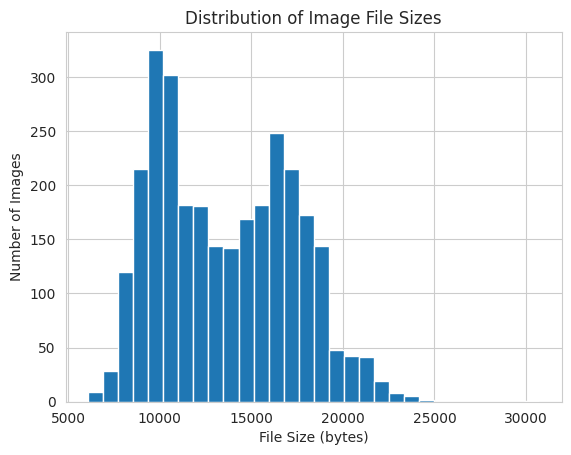

In [18]:
file_sizes = []

# Collect file sizes
for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        file_path = os.path.join(train_path, label, image_filename)
        file_size = os.path.getsize(file_path)
        file_sizes.append(file_size)

# Visualise file sizes
plt.hist(file_sizes, bins=30)
plt.title('Distribution of Image File Sizes')
plt.xlabel('File Size (bytes)')
plt.ylabel('Number of Images')
plt.show()

2. **Image Feature Embeddings File**

In [25]:
# Load the base model
base_model = ResNet50(weights='imagenet')
# Remove the output layer to get embeddings
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# Dictionary to store embeddings
embeddings = {}

for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        # Construct the full path to the image
        img_path = os.path.join(train_path, label, image_filename)
        # Load the image file, resizing it to the required input size of the model
        img = image.load_img(img_path, target_size=(224, 224))
        # Convert the image to an array and preprocess it for the model
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        # Get the image's feature representation
        features = model.predict(img_array)
        # Flatten the features to a 1D array and store in the dictionary
        embeddings[img_path] = features.flatten()



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [26]:
# Save the embeddings with joblib
dump(embeddings, 'outputs/v1/image_embeddings.joblib', compress=True)

print(f"Embeddings have been saved to 'outputs/v1/image_embeddings.joblib'.")

Embeddings have been saved to 'outputs/v1/image_embeddings.joblib'.


3. **Mean and Variability of Images per Label Plot**

Function to load images in an array

In [27]:
def load_image_as_array(my_data_dir, new_size=(50, 50), n_images_per_label=20):
    """ Load a limited number of images per label and resizes them """
    X, y = [], []
    labels = os.listdir(my_data_dir)

    for label in labels:
        counter = 0
        for image_filename in os.listdir(os.path.join(my_data_dir, label)):
            # Set a limit to save time
            if counter < n_images_per_label:
                img_path = os.path.join(my_data_dir, label, image_filename)
                img = image.load_img(img_path, target_size=new_size)
                # Ensure to normalize color images by 255
                img_resized = image.img_to_array(img) / 255 if img.mode == 'RGB' else img
                X.append(img_resized)
                y.append(label)
                counter += 1

    X = np.array(X)
    y = np.array(y)
    return X, y

Load image shape and labels in array

In [28]:
image_shape = (50, 50)
X, y = load_image_as_array(train_path, new_size=image_shape, n_images_per_label=30)
print(X.shape, y.shape)

(60, 50, 50, 3) (60,)


Plot and save mean and variability of images per label

In [29]:
def plot_mean_variability_per_labels(X, y, figsize=(12, 5), save_image=False, file_path='.'):
    """
    Compute and display the mean and standard deviation images for each label,
    with an option to save the plots to a specified path.
    """
    unique_labels = np.unique(y)
    # Loop in all labels
    for label_to_display in unique_labels:
        sns.set_style("white")

        boolean_mask = y == label_to_display
        arr = X[boolean_mask]

        # Calculate mean and standard deviation
        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)

        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")

        # Create a figure displaying mean and variability of images
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f"Average Image for label {label_to_display}")
        axes[0].imshow(avg_img)
        axes[1].set_title(f"Variability image for label {label_to_display}")
        axes[1].imshow(std_img)

        if save_image:
            plt.savefig(
                os.path.join(
                    file_path, f"avg_var_{label_to_display}.png"), bbox_inches='tight', dpi=150)
        plt.tight_layout()
        plt.show()
        print("\n")

==== Label healthy ====
Image Shape: (50, 50, 3)


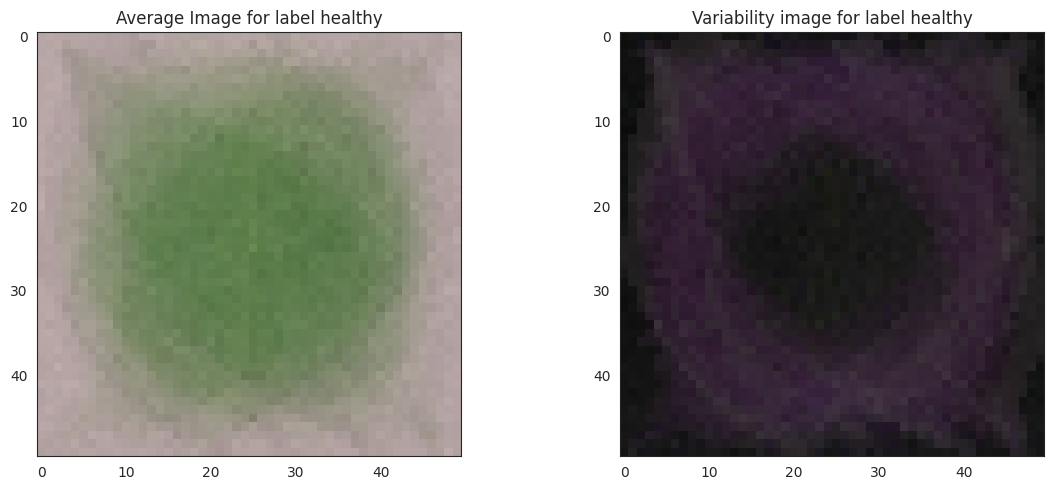



==== Label powdery_mildew ====
Image Shape: (50, 50, 3)


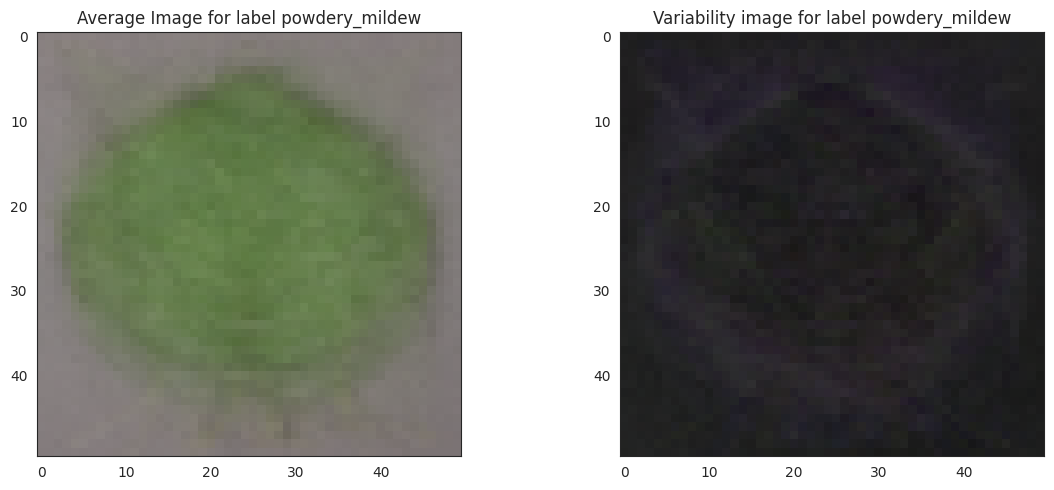

In [30]:
plot_mean_variability_per_labels(X=X, y=y, figsize=(12, 5), save_image=True, file_path='outputs/v1/')